# 批量训练和随机训练
---

Batch and Stochastic Training

本节介绍两个训练方法：批量训练和随机训练。对每个模型，我们将使用回归模型来预测模型变量。

首先加载必要的库并重置图：

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()

启动会话：

In [2]:
sess = tf.Session()

## 随机训练
---

### 生成数据

我们将创建 100 个随机正态分布采样 Normal(mean=1, sd=0.1)。目标值是值为 10.0 大小为 100 的数组。

我们还在图中为数据和目标创建必要的 placeholder。注意我们为随机训练使用 shape [1]。

In [3]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

### 模型变量和操作

我们在图中创建一个变量 A，然后创建一个模型操作，它仅将输入数据与 A 相乘。

In [4]:
# 创建变量 A
A = tf.Variable(tf.random_normal(shape=[1]))

# 添加模型操作到图
my_output = tf.multiply(x_data, A)

### 损失函数

我们为随机训练选择 L2 损失函数。当然可以很容易的置换为 L1 函数只要把 tf.square() 替换为 tf.abs()。

In [5]:
# 添加 L2 损失操作到图
loss = tf.square(my_output - y_target)

### 优化和初始化

优化函数选标准梯度递减算法，学习率设为 0.02。然后添加并运行变量初始化操作。

In [6]:
# 创建优化器
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

### 训练模型

使用 100 次迭代步骤来训练模型并每 5 次迭代打印 A 值和损失值。

In [8]:
loss_stochastic = []
# Run loop
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1) % 5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [ 2.91149712]
Loss = [ 47.44681549]
Step #10 A = [ 4.22402239]
Loss = [ 36.9659462]
Step #15 A = [ 5.28184032]
Loss = [ 23.73147583]
Step #20 A = [ 6.13094044]
Loss = [ 11.88314724]
Step #25 A = [ 6.79626465]
Loss = [ 8.86287403]
Step #30 A = [ 7.38371754]
Loss = [ 5.56315899]
Step #35 A = [ 7.80018568]
Loss = [ 7.87426901]
Step #40 A = [ 8.17025375]
Loss = [ 5.4639802]
Step #45 A = [ 8.47998142]
Loss = [ 0.82034904]
Step #50 A = [ 8.70024776]
Loss = [ 2.40972257]
Step #55 A = [ 8.97129631]
Loss = [ 0.33720574]
Step #60 A = [ 9.20511436]
Loss = [ 0.55105889]
Step #65 A = [ 9.27409172]
Loss = [ 0.09818865]
Step #70 A = [ 9.49927616]
Loss = [ 1.57330465]
Step #75 A = [ 9.69234085]
Loss = [ 1.26591468]
Step #80 A = [ 9.7326498]
Loss = [ 1.21059263]
Step #85 A = [ 9.773839]
Loss = [ 0.32789847]
Step #90 A = [ 9.95015335]
Loss = [ 0.71972936]
Step #95 A = [ 10.02939415]
Loss = [ 0.46106806]
Step #100 A = [ 10.01886368]
Loss = [ 0.001473]


## 批量训练
---

重置计算图：

In [9]:
# Batch Training:
# 重新初始化图
ops.reset_default_graph()
sess = tf.Session()

对于批量训练，我们需要声明 Batch size。size 越大越向优化值平滑收敛。但如果 size 过大的话，优化算法可能将陷入局部最小值，反而随机收敛可能会跳出。

在这里，我们将从 1 到 100 范围内改变 batch size 的值来看 batch size 所带来的收敛效果。

In [10]:
# 声明 batch size
batch_size = 25

### 生成数据

同随机训练的数据，但占位符（placeholder）为 batch size 预留了一位。

In [12]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)

x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

### 模型变量和操作

同上

In [13]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(shape=[1, 1]))

# Add operation to graph
my_output = tf.matmul(x_data, A)

### 损失函数

同上，但使用了减少均差包装

In [14]:
# L2 损失操作
loss = tf.reduce_mean(tf.square(my_output - y_target))

### 优化和初始化

同上

In [15]:
# 创建优化器
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

### 训练模型

同上

In [16]:
loss_batch = []
# Run Loop
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[ 1.954386]]
Loss = 64.2018
Step #10 A = [[ 3.44956255]]
Loss = 42.294
Step #15 A = [[ 4.64929485]]
Loss = 28.6664
Step #20 A = [[ 5.62607336]]
Loss = 18.6
Step #25 A = [[ 6.422822]]
Loss = 12.0482
Step #30 A = [[ 7.05795527]]
Loss = 7.54352
Step #35 A = [[ 7.58534098]]
Loss = 6.49288
Step #40 A = [[ 7.99967289]]
Loss = 4.56546
Step #45 A = [[ 8.33324051]]
Loss = 3.01565
Step #50 A = [[ 8.62287045]]
Loss = 2.93072
Step #55 A = [[ 8.86142063]]
Loss = 2.44408
Step #60 A = [[ 9.03105068]]
Loss = 2.20642
Step #65 A = [[ 9.18919468]]
Loss = 1.98875
Step #70 A = [[ 9.32985878]]
Loss = 1.85587
Step #75 A = [[ 9.42984962]]
Loss = 1.10387
Step #80 A = [[ 9.51809406]]
Loss = 0.789583
Step #85 A = [[ 9.60044765]]
Loss = 1.24699
Step #90 A = [[ 9.67585754]]
Loss = 1.03334
Step #95 A = [[ 9.73099613]]
Loss = 1.22274
Step #100 A = [[ 9.76146221]]
Loss = 1.03744


### 绘图看随机和批量训练的

使用 matplotlib 代码绘制两个训练的结果。

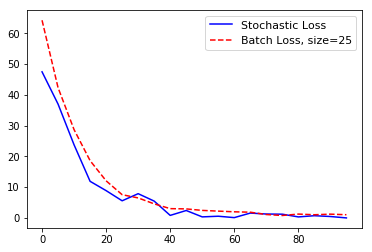

In [17]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss, size=25')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

## 总结
---

我靠，与其重写一遍代码，还不如直接看 np.random.choice(100) 和 np.random.choice(100, size=25) 的区别

In [19]:
for i in range(10):
    print(np.random.choice(10))

5
6
8
7
3
2
5
4
7
1


In [20]:
for i in range(10):
    print(np.random.choice(10, size=3))

[4 8 1]
[1 0 6]
[6 5 2]
[8 4 7]
[6 8 2]
[6 3 4]
[4 4 8]
[5 7 9]
[5 5 0]
[4 3 7]
